# Основы статистического моделирования

## Этапы моделирования

1. Определить исходы для случайной величины
2. Установить константы для модели, если необходимо
3. Установить вероятности исходов
4. Определить взаимосвязи между случайными исходами
5. Выполнить множество случайных выборок из интересующей совокупности
6. Проанализировать полученные данные

#### - примечание:

Установливать константы для модели может быть полезно для определения возможных исходов под условием. Например: для двух возможных исходов А и Б, мы можем проверять условия выигрыша как 2А+ 3Б > В как выигрышную ситуацию и проигрышную во всех обратных случаях. Еще один пример: наше событие В - это сложное событие, состоящее из А и Б одновременно. И так далее.

# 1. Загрузим библиотеки

#### - библиотеки

In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy import stats as st

#### - зафиксируем коэффициент случайности для повторяемости

In [2]:
np.random.seed(42)

# 2. Основы случайности и моделирования

## 2.1. Случайное значение из распределения Пуассона

#### - зададим лямбду (среднее число событий на интервал распределения) и размеры двух выборок

In [3]:
lam, size_1, size_2 = 5, 3, 1000

#### - сгенерируем две выборки с заданной лямбдой и размерами выборки

In [4]:
sample1 = np.random.poisson(lam, size_1)
sample2 = np.random.poisson(lam, size_2)

#### - подсчитаем абсолютную разницу между средней частотой появления события (лямбда) и средним из выборок

In [5]:
answer_1 = round(abs(lam - np.mean(sample1)), 2)
answer_2 = round(abs(lam - np.mean(sample2)), 2)

In [6]:
'|Лямбда - среднее выборки| с {} наблюдениями равно {} и с {} наблюдениями равно {}. '.format(size_1, answer_1, size_2, answer_2)

'|Лямбда - среднее выборки| с 3 наблюдениями равно 0.67 и с 1000 наблюдениями равно 0.02. '

### Вывод: размер выборки влияет на разницу между лямбдой и полученными средними в выборке - чем больше выборка, тем меньше разница

## 2.2. Моделирование игры в кости

### 1) Описание модели

Игорок побеждает, если в результате броска выпадают одинаковые значения на гранях костей. В игре участвуют стандартные игральные кости.

- Возможные исходы: значения от 1 до 6.
- Кости правильные, поэтому вероятность выпадения каждой из граней - 1/6: равномерное распределение.
- Определим искомые взаимосвязи между исходами: совпадение граней - выгрыш (1), в остальных случаях - проигрыш (0).

### 2) Моделирование

#### - сконструируем игральные кости, определим вероятность выпадения граней

In [7]:
dice = np.arange(1, 7)
probabilities = [1/6 for outcome in dice]

#### - подготовим функцию для эксперимента

In [8]:
def dice_roller(dice, probabilities, num_dices, throws):
    results = []
    wins = None
    
    for _ in range(throws):
        
        if 1 < num_dices < 3:
            generator = np.random.choice(dice, size=num_dices, p=probabilities)
            
            if generator[0] == generator[1]:
                results.append(1)
                
            else:
                results.append(0)
            
        else:
            results.append(np.random.choice(dice, size=num_dices, p=probabilities))
    
    wins = sum(results)
    wins_rate = wins / throws
    
    if 1 < num_dices < 3:
        print(
            '1. Число побед из {} бросков - {} '.format(len(results), wins) + '\n'
            '2. Частота выпадения выигрышных комбинаций - {:.2%}'.format(wins_rate)
        )
    
    return results, wins, wins_rate

#### - смоделируем бросок одной кости

In [9]:
one_throw, _, _ = dice_roller(dice, probabilities, 1, 1)

In [10]:
'Исход броска - {} '.format(one_throw[0])

'Исход броска - [5] '

#### - смоделируем бросок двух костей

In [11]:
results, wins, wins_rate = dice_roller(dice, probabilities, 2, 100000)

1. Число побед из 100000 бросков - 16676 
2. Частота выпадения выигрышных комбинаций - 16.68%


### 4) Бонус: моделирование бросков монеты

In [12]:
coin = np.arange(0, 2)
coin_probabilities = [1/2 for outcome in coin]
size = 1000000

In [13]:
sum(np.random.choice(coin, size=size, p=coin_probabilities)) / size

0.499949

## 2.3. Симуляция розыгрыша лотереи

### 1) Описание модели

Необходимо принять решение о покупке лотерейного билета, принимая во внимание математическое ожидание от игры, исходя из количества билетов в розыгрыше, стоимость билета и возможный выигрыш: стоимость лотерейного билета - 1500 рублей, выигрыш - 1 000 000 рублей.


- Возможные исходы: -1500 в случае проигрыша, 998 500 в случае победы.
- Поскольку в розыгрыше участвуют 1000 билетов, вероятность выиграть равна 1 / 1000, проиграть - 999 / 1000.
- Определим искомые взаимосвязи между исходами: совпадение граней - выгрыш (1), в остальных случаях - проигрыш (0).

### 2) Вычисление математического ожидания в результате лотереи

#### - объявим константы: число билетов, стоимость одного билета, призовой фонд, возможные исходы, вероятности выиграть и проиграть

In [14]:
num_of_tickets = 1000
price = 1500
prize = 1000000
payoffs = [-price, prize - price]
winning_chance = 1 / num_of_tickets
probabilities = [1 - winning_chance, winning_chance]

#### - вычислим математическое ожидание от игры в результате покупки одного билета

In [15]:
outcomes = np.random.choice(payoffs, size=1, p=probabilities)
outcomes

array([-1500])

#### - вычислим математическое ожидание от 2000 игр

In [16]:
outcomes = np.random.choice(payoffs, size=2000, p=probabilities)

In [17]:
outcomes.mean()

-500.0

#### - вычислим предельную стоимость билета, при которой игра имеет смысл

In [18]:
price = 0

while True:

    outcomes = np.random.choice([-price, prize-price], size=3000, p=[1 - winning_chance, winning_chance], replace=True)
    
    if outcomes.mean() < 0:
        break
    else:
        price += 1
        
answer = price - 1

'В заданных условиях, предельная стоимость билета,при которой игра имеет смысл {}'.format(answer)

'В заданных условиях, предельная стоимость билета,при которой игра имеет смысл 5'

# 3. Основы вероятностей

## Этапы моделирования для вычисления вероятности

- определить множество исходов
- определить как смоделировать один случайный исход
- определить критерий успешного исхода (наступления события) 
- выполнить множество случайных выборок из интересующей совокупности
- проанализировать полученные данные

#### - создадим колоду из 52 карт

In [19]:
deck_of_card = [('Heart', 0), ('Heart', 1), ('Heart', 2), ('Heart', 3), ('Heart', 4), ('Heart', 5), 
                ('Heart', 6), ('Heart', 7), ('Heart', 8), ('Heart', 9), ('Heart', 10), ('Heart', 11), ('Heart', 12), 
                ('Club', 0), ('Club', 1), ('Club', 2), ('Club', 3), ('Club', 4), ('Club', 5), 
                ('Club', 6), ('Club', 7), ('Club', 8), ('Club', 9), ('Club', 10), ('Club', 11), ('Club', 12), 
                ('Spade', 0), ('Spade', 1), ('Spade', 2), ('Spade', 3), ('Spade', 4), ('Spade', 5), 
                ('Spade', 6), ('Spade', 7), ('Spade', 8), ('Spade', 9), ('Spade', 10), ('Spade', 11), ('Spade', 12),
                ('Diamond', 0), ('Diamond', 1), ('Diamond', 2), ('Diamond', 3), ('Diamond', 4), ('Diamond', 5), 
                ('Diamond', 6), ('Diamond', 7), ('Diamond', 8), ('Diamond', 9), ('Diamond', 10), ('Diamond', 11), ('Diamond', 12)]

### 1) Вычисление вероятности получить "пару" в покере

In [20]:
def two_of_kind_probability(simulations):
    two_of_kind = 0
    
    for i in range(simulations):
        np.random.shuffle(deck_of_card)
        hand = deck_of_card[0:5]
        cards_in_hand = {}
        for card in hand:
            cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
            
        highest_card = max(cards_in_hand.values())
        if highest_card >= 2:
            two_of_kind += 1
    return two_of_kind / simulations

In [21]:
two_of_kind_probability(5000)

0.4888

### 2) Вероятность выиграть в игру 13

Вытаскиваем 13 карт в случайном порядке. Игрок победил, если вытащил 13 карт так, что номнал ни одной из карт не соответсвует порядку, в котором она была вытащена (например, шестерка вытащена шестой по счету - это означает поражение в игре)

In [22]:
def thirteen(simulations):
    deck = np.arange(1, 14)
    win = 0
    
    for _ in range(simulations):
        draw = np.random.choice(deck, size=len(deck), replace=False)
        coincidense = (draw == deck).any()
        
        if coincidense == 0:
            win += 1
    
    return win / simulations

In [23]:
thirteen(5000)

0.3642

### 3) Вероятность вытащить шары под условием

Вытаскивают 4 шара, эксперимент без возврата шаров в мешок: 1 и 3 - белые, 2 и 4 - черные.

#### - зададим мешок с 7 белыми и 6 черными шарами

In [24]:
urn = ['w', 'w', 'w', 'w', 'w', 'w', 'w', 'b', 'b', 'b', 'b', 'b', 'b']

In [25]:
def balls_drawer(simulations, urn):
    condition_match = 0
    for _ in range(simulations):
        draw = np.random.choice(urn, size=4, replace=False)
        if draw[0] == 'w' and draw[2] == 'w' and draw[1] == 'b' and draw[3] == 'b':
            condition_match += 1
        
    return condition_match / simulations

In [26]:
balls_drawer(5000, urn)

0.0688

### 4) Проблема дня рождения: сколько человек требуется в одной команте, чтобы встретить хотя бы у двоих с днем рождения в один день

In [27]:
days = np.arange(1, 366)
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for _ in range(sims):
        draw = np.random.choice(days, size=people, replace=True)
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

In [28]:
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

'Для достижения 50% вероятности совпадения дня рождения двух случайных людей в одной комнате, требуется {} человека'.format(people)

'Для достижения 50% вероятности совпадения дня рождения двух случайных людей в одной комнате, требуется 24 человека'

### 5) Вероятность фулл-хауса

In [29]:
n_sims, full_house, deck_of_cards = 50000, 0, deck_of_card.copy() 
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
        
    condition = (max(cards_in_hand.values()) == 3) & (min(cards_in_hand.values()) == 2)
    if  condition == True: 
        full_house += 1
        
'Вероятность получить на раздаче фулл-хауз = {}'.format(full_house/n_sims)

'Вероятность получить на раздаче фулл-хауз = 0.0013'

# 4. Процесс создания данных (DGP)

Процесс создания данных состоит из трех ключевых разделов:
1. Определение факторов влияния на данные
2. Определение источников неясности
3. Определение взимосвязи и взаимозависимости между данными

### 1) Моделирование погоды для определения вероятности сдать тест

**Контекст**

В зависимости от погоды игрок может сдать тест по разному и, как следствие, завалить его или пройти. В солнечную погоду, исходя из наблюдений, веротяность успешно сдать тест - 90 процентов, в дождливую - 30 процентов. Если завтра с 40 % вероятностью будет дождь - какова верояность сдать тест?

#### - зададим константы

In [30]:
p_rain = 0.4
p_pass = {'sun' : 0.9, 'rain' : 0.3}
simulations = 50000

#### - смоделируем экзамены

In [31]:
def exam_trial(simulations, p_rain, p_pass):
    
    outcomes= []
    
    for _ in range(simulations):
        weather = np.random.choice(['sun', 'rain'], p=[1-p_rain, p_rain])
        outcomes.append(np.random.choice(['pass', 'fail'], p=[p_pass[weather], 1-p_pass[weather]]))
    
    return round(outcomes.count('pass') / len(outcomes), 2)

In [32]:
'Вероятность сдать экзамен при заданных условиях составляет {}%'.format(exam_trial(simulations, p_rain, p_pass))

'Вероятность сдать экзамен при заданных условиях составляет 0.66%'

### 2) Моделирование результатов выборов

**Контекст**

В стране две партии - партия "Крас Мазов" и партия "Филипп Третий" - и 81 регион, каждый регион голосует отдельно. Победит та партия, которая выиграет выборы в более, чем половине регионов. Известны вероятности одной из партии выиграть выборы в конкретном регионе. Какова вероятность, что партия проиграет выборы в стране?

#### - зададим вероятности победить в каждом отдельном регионе для партии "Крас Мазов"

In [33]:
probabilities = np.random.random(50)
probabilities

array([0.45148225, 0.56267771, 0.03693303, 0.34439324, 0.60535225,
       0.68208352, 0.50719841, 0.51028877, 0.0581918 , 0.72656116,
       0.76400495, 0.72349126, 0.12378244, 0.58124715, 0.93607155,
       0.99150042, 0.42683357, 0.77564154, 0.06716924, 0.40325072,
       0.94647616, 0.60216693, 0.50484095, 0.9563692 , 0.64237653,
       0.4113978 , 0.69244128, 0.35831459, 0.64260177, 0.85312264,
       0.11706253, 0.75939554, 0.60506708, 0.85611043, 0.58782085,
       0.93513816, 0.77314931, 0.38097552, 0.35912325, 0.60605   ,
       0.97922991, 0.35416122, 0.63556106, 0.72901147, 0.18897029,
       0.90543023, 0.07866871, 0.0933479 , 0.03050959, 0.97790956])

#### - создадим модель для определения вероятности проиграть выборы

In [34]:
simulations = 5000

In [35]:
def elections(simulations, probabilities):
    outcomes = []
    
    for _ in range(simulations):
        one_elections_outcome = np.random.binomial(n=1, p=probabilities).mean()
        outcomes.append(one_elections_outcome)
        
    return round((sum([1 for x in outcomes if x < 0.5]) / len(outcomes)) * 100, 2)

In [36]:
'Для партии "Крас Мазов" вероятность проиграть выборы, при заданных вероятностях выиграть в каждом регионе, составляет {}%'.format(elections(simulations, probabilities))

'Для партии "Крас Мазов" вероятность проиграть выборы, при заданных вероятностях выиграть в каждом регионе, составляет 13.12%'

### 3) Вычисление вероятности набрать вес

**Контекст**

Необходимо расчитать вероятность набрать вес в зависимости от посещения спортивного зала при условии, что единственный наблюдаемый признак - количество шагов в день.

- если шагов более 10000 в день, то вероятность набрать вес - 20%, потерять вес - 80%, 
- если меньше 5000 шагов в день, то вероятность набрать вес - 80%, потерять вес - 20%, 
- во всех остальных случаях - 50 на 50,
- игрок посещает спортзал в 40% случаев из 100 возможных,
- как следствие, число шагов получим из случайной величины распредления Пуассона (лямбда - среднее числом шагов на интервал, полученной с учетом вероятности посещения спортзала)

#### - зададим константы

In [37]:
def weigth_gain_probability(simulations, days):
    outcomes = []
    for _ in range(simulations):
        
        for _ in range(days):
            w = []
            lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
            steps = np.random.poisson(lam=lam)
            if steps > 10000:
                probability = [0.2, 0.8]
            elif steps < 8000:
                probability = [0.8, 0.2]
            else:
                probability = [0.5, 0.5]

            w.append(np.random.choice([1, -1], p=probability))
            
        outcomes.append(sum(w))
        
    return round((sum([1 for x in outcomes if x < 0]) / len(outcomes)) * 100, 2)

In [38]:
'Вероятность потери веса при заданных условиях равна {}% '.format(weigth_gain_probability(1000, 30))

'Вероятность потери веса при заданных условиях равна 45.6% '

### 4) Моделирование воронки продаж и возможности убытков

**Контекст**

Интернет-магазин рекламирует себя с помощью баннеров. Сейчас издержки на рекламу сравнительно невысокие, но магазин задумывается над увеличением издержек на рекламу. Задача: рассчитать вероятность убытков с учетом потенциального увеличения расходов на рекламу.

- посещаемость сайта, на котором размещена реклама - 100000 посетителей со стандартным отклонением 2000,
- при уровне имеющихся расходов около 10% от посмотревших рекламу переходят на сайт магазина,
- из 10% перешедших около 20% регистрируются или авторизируются,
- из 20% процентов авторизировавшихся 10% совершают покупку,
- средний чек - 1000 рублей,
- предполагается, что увеличив рекламный бюджет на 3000 рублей, сайт получит прирост на 20% как по переходам, так и по регистрации


**Функции распределения на каждом этапе**:

- число просмотров: случайная величина из распределения Пуассона с лямбдой равной случайной из нормального распределения,
- переходы на сайт: случайная величина из биноминального распеделения (перейдет или нет),
- регистрация: случайная величина из биноминального распеделения (зарегистрируется или нет),
- покупка: случайная величина из [экспоненциального распределения](#https://baguzin.ru/wp/ravnomernoe-i-eksponentsialnoe-rasp/), поскольку нужно непрерывное распределние и экспоненциальное по своей форме позволяет получить правдоподобное значение чека, принимая во внимание, что размер чека стремиться к снижению.

#### - объявим словари, содержащие информацию о текущей конверсии и предполагаемой конверсии  случае увеличения расходов

In [39]:
ct_rate = {'low' : 0.1, 'high' : 1.2*0.1}
su_rate = {'low' : 0.2, 'high' : 1.2*0.2}

#### - объявим функцию, моделирующую регистрацию на сайте в зависимости от издержек

In [40]:
def get_sign_ups(simulations, ct_rate, su_rate, costs):
    sign_ups = []
    
    for _ in range(simulations):
        lam = np.random.normal(loc=10000, scale=2000)
        impressions = np.random.poisson(lam=lam)
        clicks = np.random.binomial(n=impressions, p=[ct_rate[costs]])
        sign_ups.append(np.random.binomial(n=clicks, p=[su_rate[costs]]))
        
    return sign_ups

#### - объявим функцию, моделирующую выручку от покупок в зависимости от зарегистрировавшихся при заданном уровне издержек на рекламу

In [41]:
def get_revenue(simulations, ct_rate, su_rate, costs):
    revenue = []
    sign_ups = get_sign_ups(simulations, ct_rate, su_rate, costs)
    
    for clients in sign_ups:
        purchases = np.random.binomial(n=clients, p=0.1)
        revenue.append(sum(np.random.exponential(scale=1000, size=purchases)))
    return revenue

#### - объявим функцию, рассчитывающую вероятность убытков в случае увеличения расходов на рекламу: подсчитаем разницу межджу выручкой с высокими издержками и низкими издержками и сравним с величиной издержек на рекламу.

In [42]:
def loss_possibilities(simulations, costs_for_improvements, ct_rate, su_rate):
    costs_for_improvements = costs_for_improvements
    high_costs_revenue = get_revenue(simulations, ct_rate, su_rate, 'high')
    low_costs_revenue = get_revenue(simulations, ct_rate, su_rate, 'low')
    
    return round((sum([1 for i in range(len(high_costs_revenue)) if (high_costs_revenue[i] - low_costs_revenue[i]) < costs_for_improvements]) / simulations) * 100, 2)

In [43]:
'Вероятность убытков в случае увеличения расходов на рекламу равна {}%'.format(loss_possibilities(100000, 3000, ct_rate, su_rate))

'Вероятность убытков в случае увеличения расходов на рекламу равна 31.49%'

# 5. Ресемплирование данных

## 5.1. Простой пример для демонстрации разницы в вероятностях с возвращением и без возвращения

Игрок вытаскивает из корзины с десятью шарами ровно три шара. Какова вероятность вытащить шары в следующей последовательности: синий, зеленый, желтый.

In [44]:
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = ['b', 'b', 'b', 'g', 'g', 'y', 'y', 'y', 'y', 'y']

for i in range(sims):
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    
    if (sample_rep[0] == 'b') & (sample_rep[1] == 'g') & (sample_rep[2] == 'y'): 
        success_rep += 1
    if (sample_no_rep[0] == 'b') & (sample_no_rep[1] == 'g') & (sample_no_rep[2] == 'y'): 
        success_no_rep += 1

prob_with_replacement = success_rep / sims
prob_without_replacement = success_no_rep / sims

'Вероятность с возвращением = {}, без возвращения = {}'.format(prob_with_replacement, prob_without_replacement)

'Вероятность с возвращением = 0.0287, без возвращения = 0.0413'

## 5.2. Bootstrapping

### 1) Простой бутстрап

In [45]:
stuff = np.random.randint(1, 11, size=100)
stuff

array([10,  9,  2, 10,  2,  8,  4,  1,  2,  4,  8,  4,  7, 10,  2,  3,  2,
        3,  7, 10,  6,  3,  9,  4,  5,  8,  2,  7,  1,  8,  1,  3, 10,  5,
        9,  9,  8,  1,  1,  8,  4,  5,  2,  2,  5,  8,  4,  6,  5,  1,  3,
        1,  7,  8,  2,  9,  3,  2,  3,  1, 10,  3,  8,  6,  8,  9,  2,  6,
        8,  6,  6,  6,  8,  2,  4,  3, 10, 10,  4,  5,  8,  5,  9,  5,  1,
        9,  2,  9,  7,  2,  9,  3,  6,  1,  9,  4,  8,  1,  6,  1])

In [46]:
stuff.mean()

5.26

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93d0ae0518>]],
      dtype=object)

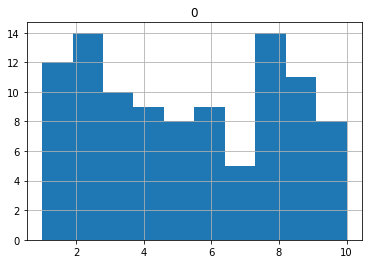

In [47]:
pd.DataFrame(stuff).hist()

In [48]:
bootstraped = []
for _ in range(100000):
    temp_sample = np.random.choice(stuff, size=len(stuff), replace=True)
    sample_mean = temp_sample.mean()
    bootstraped.append(sample_mean)

In [49]:
np.mean(bootstraped)

5.2600009

In [50]:
np.percentile(bootstraped, [2.5, 97.5])

array([4.68, 5.84])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93ce9cd630>]],
      dtype=object)

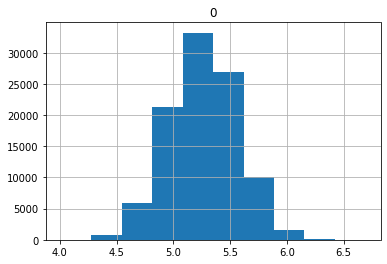

In [51]:
pd.DataFrame(bootstraped).hist()

# 6. Продвинутое моделирование

## 1) Оптимизация издержек кукурузной фермы

**Контекст**

Небольшая ферма хочет оптимизровать издержки при выращивании кукурузы.

- на производство кукурузы влияет два фактора: осадки и издержки
- средний объем производства кукурузы определяется функцией: $100 \times (издержки)^{0.1} \times (осадки)^{0.2}$
- объем произодства за определенный период определяется случайной величиной из распределения Пуассона с лямбдой равной среднему производству кукурузы
- осадки определены как случайная величина из нормального распределения со средним равным 50 и стандартным отклонением 15
- цена определена как случайная величина из нормального распределения со средним равным 40 и стандартным отклонением 10

#### - определим константы: издержки и осадки

In [52]:
cost = 5000
rain = np.random.normal(loc=50, scale=15)
price = np.random.normal(loc=40, scale=10)

#### - объявим функцию, которая будет моделировать производство кукурузы и выведем результат одного цикла производства кукурузы, чтобы убедиться, что функция работает

In [53]:
def corn_production(cost, rain):
    mean_corn = 100 * cost**0.1 * rain**0.2
    corn_prodution = np.random.poisson(lam=mean_corn)
    
    return corn_prodution

In [54]:
corn_production(cost, rain)

509

#### - объявим функцию, которая будет моделировать спрос

In [55]:
def corn_demanded(price):
    mean_corn = 1000 - 8*price
    corn = np.random.poisson(abs(mean_corn))
    return corn

In [56]:
corn_demanded(40)

719

#### - объявим функцию, которая будет считать прибыль

In [57]:
def profit(cost):
    rain = np.random.normal(loc=50, scale=15)
    supply = corn_production(cost, rain)
    demand = corn_demanded(price)
    profit = 0
    
    equity_short = supply <= demand
    
    if equity_short == True:
        profits = supply * price - cost
    else:
        profits = demand * price - cost
    
    return profits

In [58]:
profit(cost)

11580.529924094215

#### - оптимизация издержек

In [59]:
def cost_optimization(simulations):
    results = {}
    costs_levels = np.arange(100, 5100, 100)
    
    for cost in costs_levels:
        profit_temp = []
        for i in range(simulations):
            profit_temp.append(profit(cost))
        
        results[cost] = np.mean(profit_temp)
        
    max_profit = [x for x in results.keys() if results[x] == max(results.values())][0]
    
    return max_profit

In [60]:
cost_optimization(100000)

1800

In [61]:
profit(1800)

15195.987393718446

## 2) Анализ мощности статистического теста

**Контекст:**

Владельцы небольшого магазина электроники хотят узнать сколько пользователей должны посмотреть на рекламу при А/B тестировании, чтобы при проведении статистического теста отвергнуть нулевую гипотезу о том, что средний уровень переходов не изменился, получить мощность равной 80% при уровне значимости 5%.

- средняя посещаемость равна 10000 человек в день,
- стандартное отклонение равно 2256,
- желаемый эффект от новой рекламы 5 %.


**Основные факторы, влияющие на мощность статистического теста - способность теста определять статистическую значимость и, как следствие вероятность отвергнуть нулевую гипотезу в пользу правильной альтернативы: **

- уровень значимости
- наблюдаемый эффект в генеральной совокупности (его изменение)
- размер выборки, использованный для определения эффекта

**Из трех представленных факторов (не являющихся исчерпывающими) с помощью моделирования можно вычислить размер выборки, необходимой для получения достаточной мощности при заданном уровне значимости. Это важно, чтобы узнать, какого размера требуются выборки для проведения А/B тестирования**.

Для этого:
- многократно генерируются случайные выборки из имеющейся выборки (контрольной), а также симулируется выборка с поправкой на эффект (выборка на которую влияли), который мы предполагаем достигнуть.
- проводится статистический тест, собирается значение p.
- рассчитывается мощность как отношение суммы значений p при которых они были ниже уровня значимости к числу повторений.
- при достижении искомого уровня значимости GPD останавливается.

**Например, для уровня значимости 0.05 рекомендуемая мощность равна 80%**.

#### - объявим константы: среднее выборки, стандартное отклонение выборки, уровень эффекта от воздействия на выборку, изначальный размер выборки, количество симуляций

In [62]:
control_mean = 10000
control_std = 2256
effect = 0.05
sample_size = 50
sims = 1000
power = 0

In [63]:
while power < 0.8:
    control_group = np.random.normal(loc=control_mean, scale=control_std, size=(sample_size, sims))
    treated_group = np.random.normal(loc=control_mean * (1 + effect), scale=control_std, size=(sample_size, sims))

    _, p_value = st.ttest_ind(control_group, treated_group)

    power = (p_value < 0.05).sum() / sims

    sample_size += 10

'Для достижения мощности в 80% необходима выборка в размере {}'.format(sample_size)

'Для достижения мощности в 80% необходима выборка в размере 330'

In [64]:
power

0.802